<a href="https://colab.research.google.com/github/svarshney25/concealedWeaponDetection/blob/main/Gun_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font color="#6495ED"><h1><b>MAKE A COPY OF THIS NOTEBOOK SO YOUR EDITS ARE SAVED</b></h1></font>


# 👋 **Welcome to the data visualization notebook!**
In this notebook, we'll take a look at different techniques for clearly and effectively visualizing data.

We'll be working with medical data and insurance costs for hundreds of patients.

In [ ]:
#@title Loading in our data and importing necessary packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import cv2

# Our data is stored on Google Cloud. 
# We can use a command like this to upload it into Google Colab's file system
!wget -q --show-progress "https://storage.googleapis.com/inspirit-ai-data-bucket-1/Data/AI%20%2B%20X/Independent/Main%20Curriculum/Numerical%20Data%20Preprocessing/medical_costs.csv"

medical_costs.csv   100%[===================>]  54.15K  --.-KB/s    in 0s      


Mounted at /content/drive
'1000G1000F Journal Entries.gdoc'
'1000g1000f water quality.gslides'
'2022 AP HUG Practice Exam One.gdoc'
'About Me.gsite'
'Ambassadors Outreach Tracker.gsheet'
'artificial organs.gslides'
'Biology Notes.gdoc'
'Book Summaries.gdoc'
'CCCBSA-Release-and-Waiver-2021[22044].gdoc'
'CCCBSA-Release-and-Waiver-2021[22044].pdf'
'CCC Eagle Yearbook Template.docx'
'Chemistry Notes .gdoc'
'cit in comm wfs hours.gdoc'
'cit in society.gdoc'
'cit in world.gdoc'
'Citizenship in the Nation Blue Card for Shivika Varshney.pdf'
 Class.gsite
'Climate Change affects girls.gslides'
 Club.gsite
'Code Her World'
 coding_project.xlsx
'Colab Notebooks'
'Communication MB - draft campfire program.gdoc'
'Congressional Scandinavia Planning.gsheet'
'Copy of 2022 KWK: Scholar Project Collaboration Protocol Template.gdoc'
'Copy of APday14-buffers intro handout.gdoc'
'Copy of APday4-pH calc practice.gdoc'
'Copy of Climate Change Advocacy Template.gdoc'
'Copy of Gun Detection Dataset with yolo v

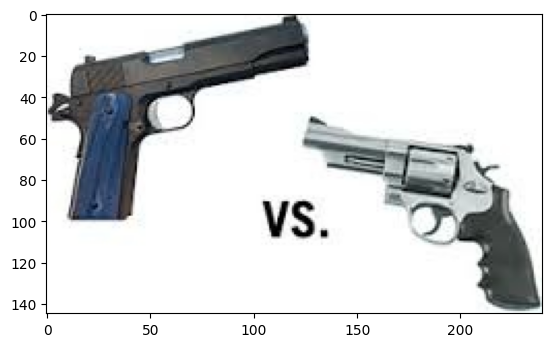

In [ ]:
#@title
from google.colab import drive
drive.mount('/content/drive')
#!unzip "Gun Dataset" #path to zip file .zip
!ls "/content/drive/MyDrive"
img1 = cv2.imread("/content/drive/MyDrive/GunDataset/Unzipped/Train/yes-weapons/1.jpg")
plt.imshow(img1)

In [ ]:
#@title
#
from google.colab import drive
#drive.mount('/content/drive')


In [ ]:
#@title
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
# Any results you write to the current directory are saved as output.

import matplotlib.pyplot as plt
import cv2
import glob

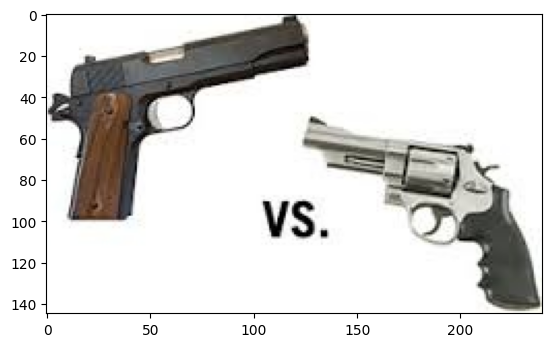

In [ ]:
#@title
image=cv2.imread('/content/drive/MyDrive/GunDataset/Unzipped/Train/yes-weapons/1.jpg')
shape=image.shape
plt.figure()
plt.imshow(image[:,:,::-1])

In [ ]:
#@title
label=open('/content/drive/MyDrive/GunDataset/Unzipped/Train/yes-weapons/1.txt','r').read()
print(label)

1 0.27291666666666664 0.3482758620689655 0.5208333333333334 0.6827586206896552
1 0.7520833333333333 0.6620689655172414 0.4791666666666667 0.6758620689655173


In [ ]:
#@title
GunDataset = [cv2.imread(file) for file in glob.glob("/content/drive/MyDrive/GunDataset/Unzipped/Train/yes-weapons/1.jpg")]
#GunDataset=cv2.imread('/content/drive/MyDrive/GunDataset/Unzipped/*.jpg')
# print(GunDataset)

In [ ]:
#@title
# this function prints out the coordinates of each bounding box 
def from_yolo_to_cor(box, shape):
    box = box[1:]
    # print("box equals", box) #added this and line 2 because the function was including the first 4 coordinates, but it needs to exclude the 1 which means it's a weapon
    img_h, img_w, _ = shape
    x1, y1 = int((box[0] + box[2]/2)*img_w), int((box[1] + box[3]/2)*img_h)
    x2, y2 = int((box[0] - box[2]/2)*img_w), int((box[1] - box[3]/2)*img_h)    
    return x1, y1, x2, y2


In [ ]:
#@title
#turning the labels into a one dimensional column vector of the 5 coordinates (1 for whether it's a gun and then the 4 bounding box coordinates)
labels=label.split('\n')
print(labels)
print([lab.split(" ") for lab in labels])
labels = [list(map(float, f)) for f in [lab.split(" ") for lab in labels]]
print(labels)

coords = [list(from_yolo_to_cor(c, image.shape)) for c in labels] #pass through each 5 set list
print(coords)

['1 0.27291666666666664 0.3482758620689655 0.5208333333333334 0.6827586206896552', '1 0.7520833333333333 0.6620689655172414 0.4791666666666667 0.6758620689655173']
[['1', '0.27291666666666664', '0.3482758620689655', '0.5208333333333334', '0.6827586206896552'], ['1', '0.7520833333333333', '0.6620689655172414', '0.4791666666666667', '0.6758620689655173']]
[[1.0, 0.27291666666666664, 0.3482758620689655, 0.5208333333333334, 0.6827586206896552], [1.0, 0.7520833333333333, 0.6620689655172414, 0.4791666666666667, 0.6758620689655173]]
[[128, 100, 2, 0], [238, 145, 122, 47]]


[128, 100]
[2, 0]
[238, 145]
[122, 47]


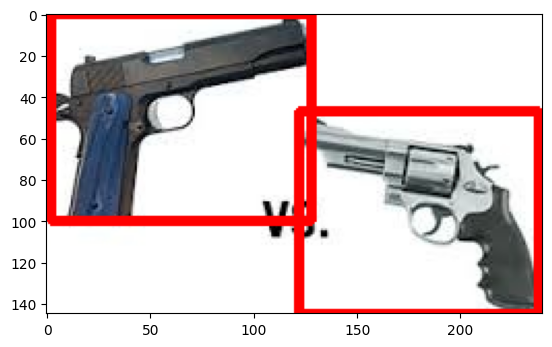

In [ ]:
#@title
image_bbox = image
for i in range(len(coords)):
  p1 = coords[i][0:2]
  print(p1)
  p2 = coords[i][2:4]
  print(p2)
  image_bbox = cv2.rectangle(image_bbox, p1, p2, (255,0,0), 3) #giving coordinates of bounding box 
plt.imshow(image_bbox)

# YOLO

In [ ]:
#@title Run this to download data and prepare our environment! { display-mode: "form" }

import matplotlib.pyplot as plt
import os
from PIL import Image
import gdown

import argparse
import numpy as np
from keras.layers import Conv2D, Input, BatchNormalization, LeakyReLU, ZeroPadding2D, UpSampling2D
from keras.layers import add, concatenate
#from keras.layers.merge import add, concatenate
from keras.models import Model
import struct
import cv2
from copy import deepcopy

# Prepare data
DATA_ROOT = '/content/drive/MyDrive/GunDataset/Unzipped'
os.makedirs(DATA_ROOT, exist_ok=True)

# image_url = 'https://drive.google.com/uc?id=12ZpZ5H0kJIkWk6y4ktGfqR5OTKofL7qw'
# image_path = os.path.join(DATA_ROOT, 'image.jpg')
# gdown.download(image_url, image_path, True)
!wget -O /content/data/image.jpg "https://storage.googleapis.com/inspirit-ai-data-bucket-1/Data/AI%20Scholars/Sessions%206%20-%2010%20(Projects)/Project%20-%20%20Object%20Detection%20(Autonomous%20Vehicles)/image.jpg"

# image2_url = 'https://drive.google.com/uc?id=1_WpFbGEuS2r19UeP6wekbcF0kb-0nH18'
# image2_path = os.path.join(DATA_ROOT, 'image2.jpg')
# gdown.download(image2_url, image2_path, True)
!wget -O /content/data/image2.jpg "https://storage.googleapis.com/inspirit-ai-data-bucket-1/Data/AI%20Scholars/Sessions%206%20-%2010%20(Projects)/Project%20-%20%20Object%20Detection%20(Autonomous%20Vehicles)/image2.jpg"

# video_url = 'https://drive.google.com/uc?id=1xFGjpzhZVYtNor9hJevvxysGESZJIMDz'
# video_path = os.path.join(DATA_ROOT, 'video1.mp4')
# gdown.download(video_url, video_path, True)
!wget -O /content/data/video1.mp4 "https://storage.googleapis.com/inspirit-ai-data-bucket-1/Data/AI%20Scholars/Sessions%206%20-%2010%20(Projects)/Project%20-%20%20Object%20Detection%20(Autonomous%20Vehicles)/6.mp4"

# model_url = 'https://drive.google.com/uc?id=19XKJWMKDfDlag2MR8ofjwvxhtr9BxqqN'
model_path = os.path.join(DATA_ROOT, 'yolo_weights.h5')
# gdown.download(model_url, model_path, True)
!wget -O /content/data/yolo_weights.h5 "https://storage.googleapis.com/inspirit-ai-data-bucket-1/Data/AI%20Scholars/Sessions%206%20-%2010%20(Projects)/Project%20-%20%20Object%20Detection%20(Autonomous%20Vehicles)/yolo.h5"
!wget -O DATA_ROOT + "/yolo_weights.h5" "https://storage.googleapis.com/inspirit-ai-data-bucket-1/Data/AI%20Scholars/Sessions%206%20-%2010%20(Projects)/Project%20-%20%20Object%20Detection%20(Autonomous%20Vehicles)/yolo.h5"

labels = ["person", "bicycle", "car", "motorbike", "aeroplane", "bus", "train", "truck", \
              "boat", "traffic light", "fire hydrant", "stop sign", "parking meter", "bench", \
              "bird", "cat", "dog", "horse", "sheep", "cow", "elephant", "bear", "zebra", "giraffe", \
              "backpack", "umbrella", "handbag", "tie", "suitcase", "frisbee", "skis", "snowboard", \
              "sports ball", "kite", "baseball bat", "baseball glove", "skateboard", "surfboard", \
              "tennis racket", "bottle", "wine glass", "cup", "fork", "knife", "spoon", "bowl", "banana", \
              "apple", "sandwich", "orange", "broccoli", "carrot", "hot dog", "pizza", "donut", "cake", \
              "chair", "sofa", "pottedplant", "bed", "diningtable", "toilet", "tvmonitor", "laptop", "mouse", \
              "remote", "keyboard", "cell phone", "microwave", "oven", "toaster", "sink", "refrigerator", \
              "book", "clock", "vase", "scissors", "teddy bear", "hair drier", "toothbrush"]  

class BoundBox:
    def __init__(self, xmin, ymin, xmax, ymax, objness = None, classes = None):
        self.xmin = xmin
        self.ymin = ymin
        self.xmax = xmax
        self.ymax = ymax
        
        self.objness = objness
        self.classes = classes

        self.label = -1
        self.score = -1

    def get_label(self):
        if self.label == -1:
            self.label = np.argmax(self.classes)
        
        return self.label
    
    def get_score(self):
        if self.score == -1:
            self.score = self.classes[self.get_label()]
            
        return self.score

def _interval_overlap(interval_a, interval_b):
    x1, x2 = interval_a
    x3, x4 = interval_b

    if x3 < x1:
        if x4 < x1:
            return 0
        else:
            return min(x2,x4) - x1
    else:
        if x2 < x3:
             return 0
        else:
            return min(x2,x4) - x3          

def _sigmoid(x):
    return 1. / (1. + np.exp(-x))

def bbox_iou(box1, box2):
    intersect_w = _interval_overlap([box1.xmin, box1.xmax], [box2.xmin, box2.xmax])
    intersect_h = _interval_overlap([box1.ymin, box1.ymax], [box2.ymin, box2.ymax])
    
    intersect = intersect_w * intersect_h

    w1, h1 = box1.xmax-box1.xmin, box1.ymax-box1.ymin
    w2, h2 = box2.xmax-box2.xmin, box2.ymax-box2.ymin
    
    union = w1*h1 + w2*h2 - intersect
    
    return float(intersect) / union

def preprocess_input(image_pil, net_h, net_w):
    image = np.asarray(image_pil)
    new_h, new_w, _ = image.shape
    print("new_h, new_w=", new_h, new_w)

    # determine the new size of the image
    if (float(net_w)/new_w) < (float(net_h)/new_h):
        new_h = (new_h * net_w)/new_w
        new_w = net_w
    else:
        new_w = (new_w * net_h)/new_h
        new_h = net_h

    # resize the image to the new size
    # resized = cv2.resize(image[:,:,::-1]/255., (int(new_w), int(new_h)))
    resized = cv2.resize(image/255., (int(new_w), int(new_h)))
    
    print("resized_w, resized_h=", resized.shape)

    # embed the image into the standard letter box
    # shivika 
    # min_h = int(min([new_h, int((net_h+new_h)//2)]))
    # min_w = int(min([new_w, int((net_w+new_w)//2)]))
    # print(type(new_h), type(new_w))
    # new_image[int((net_h-new_h)//2):min_h, int((net_w-new_w)//2):min_w, :] = resized
    new_image = np.ones((net_h, net_w, 3)) * 0.5
    new_image[int((net_h-new_h)//2):int((net_h+new_h)//2), int((net_w-new_w)//2):int((net_w+new_w)//2), :] = resized

    # x_coordinate = list(range(int((net_h-new_h)//2), int((net_h+new_h))//2 + 1))
    # print("x_coordinate length=", len(x_coordinate))
    # y_coordinate =list(range(int((net_w-new_w)//2), int((net_w+new_w))//2 + 1))
    # print("y_coordinate length=", len(y_coordinate))

    # new_image[x_coordinate, y_coordinate, :] = resized
    new_image = np.expand_dims(new_image, 0)

    return new_image


def decode_netout(netout_, obj_thresh, anchors_, image_h, image_w, net_h, net_w):
    netout_all = deepcopy(netout_)
    boxes_all = []
    for i in range(len(netout_all)):
      netout = netout_all[i][0]
      anchors = anchors_[i]

      grid_h, grid_w = netout.shape[:2]
      nb_box = 3
      netout = netout.reshape((grid_h, grid_w, nb_box, -1))
      nb_class = netout.shape[-1] - 5

      boxes = []

      netout[..., :2]  = _sigmoid(netout[..., :2])
      netout[..., 4:]  = _sigmoid(netout[..., 4:])
      netout[..., 5:]  = netout[..., 4][..., np.newaxis] * netout[..., 5:]
      netout[..., 5:] *= netout[..., 5:] > obj_thresh

      for i in range(grid_h*grid_w):
          row = i // grid_w
          col = i % grid_w
          
          for b in range(nb_box):
              # 4th element is objectness score
              objectness = netout[row][col][b][4]
              #objectness = netout[..., :4]
              # last elements are class probabilities
              classes = netout[row][col][b][5:]
              
              if((classes <= obj_thresh).all()): continue
              
              # first 4 elements are x, y, w, and h
              x, y, w, h = netout[row][col][b][:4]

              x = (col + x) / grid_w # center position, unit: image width
              y = (row + y) / grid_h # center position, unit: image height
              w = anchors[b][0] * np.exp(w) / net_w # unit: image width
              h = anchors[b][1] * np.exp(h) / net_h # unit: image height  
            
              box = BoundBox(x-w/2, y-h/2, x+w/2, y+h/2, objectness, classes)
              #box = BoundBox(x-w/2, y-h/2, x+w/2, y+h/2, None, classes)

              boxes.append(box)

      boxes_all += boxes

    # Correct boxes
    boxes_all = correct_yolo_boxes(boxes_all, image_h, image_w, net_h, net_w)
    
    return boxes_all, classes

def correct_yolo_boxes(boxes_, image_h, image_w, net_h, net_w):
    boxes = deepcopy(boxes_)
    if (float(net_w)/image_w) < (float(net_h)/image_h):
        new_w = net_w
        new_h = (image_h*net_w)/image_w
    else:
        new_h = net_w
        new_w = (image_w*net_h)/image_h
        
    for i in range(len(boxes)):
        x_offset, x_scale = (net_w - new_w)/2./net_w, float(new_w)/net_w
        y_offset, y_scale = (net_h - new_h)/2./net_h, float(new_h)/net_h
        
        boxes[i].xmin = int((boxes[i].xmin - x_offset) / x_scale * image_w)
        boxes[i].xmax = int((boxes[i].xmax - x_offset) / x_scale * image_w)
        boxes[i].ymin = int((boxes[i].ymin - y_offset) / y_scale * image_h)
        boxes[i].ymax = int((boxes[i].ymax - y_offset) / y_scale * image_h)
    return boxes
        
def do_nms(boxes_, nms_thresh, obj_thresh):
    boxes = deepcopy(boxes_)
    if len(boxes) > 0:
        num_class = len(boxes[0].classes)
    else:
        return
        
    for c in range(num_class):
        sorted_indices = np.argsort([-box.classes[c] for box in boxes])

        for i in range(len(sorted_indices)):
            index_i = sorted_indices[i]

            if boxes[index_i].classes[c] == 0: continue

            for j in range(i+1, len(sorted_indices)):
                index_j = sorted_indices[j]

                if bbox_iou(boxes[index_i], boxes[index_j]) >= nms_thresh:
                    boxes[index_j].classes[c] = 0

    new_boxes = []
    for box in boxes:
        label = -1
        
        for i in range(num_class):
            if box.classes[i] > obj_thresh:
                label = i
                # print("{}: {}, ({}, {})".format(labels[i], box.classes[i]*100, box.xmin, box.ymin))
                box.label = label
                box.score = box.classes[i]
                new_boxes.append(box)    

    return new_boxes


from PIL import ImageDraw, ImageFont
import colorsys

def draw_boxes(image_, boxes, labels):
    image = image_.copy()
    image_w, image_h = image.size
    font = ImageFont.truetype(font='/usr/share/fonts/truetype/liberation/LiberationMono-Regular.ttf',
                    size=np.floor(3e-2 * image_h + 0.5).astype('int32'))
    thickness = (image_w + image_h) // 300

    # Generate colors for drawing bounding boxes.
    hsv_tuples = [(x / len(labels), 1., 1.)
                  for x in range(len(labels))]
    colors = list(map(lambda x: colorsys.hsv_to_rgb(*x), hsv_tuples))
    colors = list(
        map(lambda x: (int(x[0] * 255), int(x[1] * 255), int(x[2] * 255)), colors))
    np.random.seed(10101)  # Fixed seed for consistent colors across runs.
    np.random.shuffle(colors)  # Shuffle colors to decorrelate adjacent classes.
    np.random.seed(None)  # Reset seed to default.

    # shivika 
    if boxes is None: 
      boxes = []

    for i, box in reversed(list(enumerate(boxes))):
        c = box.get_label()
        predicted_class = labels[c]
        score = box.get_score()
        top, left, bottom, right = box.ymin, box.xmin, box.ymax, box.xmax

        label = '{} {:.2f}'.format(predicted_class, score)
        draw = ImageDraw.Draw(image)
        label_size = draw.textsize(label, font)
        #label_size = draw.textsize(label)

        top = max(0, np.floor(top + 0.5).astype('int32'))
        left = max(0, np.floor(left + 0.5).astype('int32'))
        bottom = min(image_h, np.floor(bottom + 0.5).astype('int32'))
        right = min(image_w, np.floor(right + 0.5).astype('int32'))
        print(label, (left, top), (right, bottom))

        if top - label_size[1] >= 0:
            text_origin = np.array([left, top - label_size[1]])
        else:
            text_origin = np.array([left, top + 1])

        # My kingdom for a good redistributable image drawing library.
        for i in range(thickness):
            draw.rectangle(
                [left + i, top + i, right - i, bottom - i],
                outline=colors[c])
        draw.rectangle(
            [tuple(text_origin), tuple(text_origin + label_size)],
            fill=colors[c])
        draw.text(text_origin, label, fill=(0, 0, 0), font=font)
        #draw.text(text_origin, label, fill=(0, 0, 0))
        del draw
    return image  

/content/data/image.jpg: No such file or directory
/content/data/image2.jpg: No such file or directory
/content/data/video1.mp4: No such file or directory
/content/data/yolo_weights.h5: No such file or directory
--2023-05-15 00:11:33--  http://+/
Resolving + (+)... failed: Name or service not known.
wget: unable to resolve host address ‘+’
/yolo_weights.h5: Scheme missing.
--2023-05-15 00:11:33--  https://storage.googleapis.com/inspirit-ai-data-bucket-1/Data/AI%20Scholars/Sessions%206%20-%2010%20(Projects)/Project%20-%20%20Object%20Detection%20(Autonomous%20Vehicles)/yolo.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.119.128, 108.177.111.128, 142.250.1.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.119.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248686624 (237M) [application/octet-stream]
Saving to: ‘DATA_ROOT’

DATA_ROOT           100%[===================>] 237.17M  85.3MB/s    in 2.8s    

202

In [ ]:
def plot_acc(history, ax = None, xlabel = 'Epoch #'):
    history = history.history
    history.update({'epoch':list(range(len(history['val_accuracy'])))})
    history = pd.DataFrame.from_dict(history)

    best_epoch = history.sort_values(by = 'val_accuracy', ascending = False).iloc[0]['epoch']

    if not ax:
      f, ax = plt.subplots(1,1)
    sns.lineplot(x = 'epoch', y = 'val_accuracy', data = history, label = 'Validation', ax = ax)
    sns.lineplot(x = 'epoch', y = 'accuracy', data = history, label = 'Training', ax = ax)
    ax.axhline(0.5, linestyle = '--',color='red', label = 'Chance')
    ax.axvline(x = best_epoch, linestyle = '--', color = 'green', label = 'Best Epoch')  
    ax.legend(loc = 7)    
    ax.set_ylim([0.4, 1])

    ax.set_xlabel(xlabel)
    ax.set_ylabel('Accuracy (Fraction)')
    
    plt.show()

In [ ]:
#@title
import tensorflow as tf

device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
anchors = [[[116,90], [156,198], [373,326]], [[30,61], [62,45], [59,119]], [[10,13], [16,30], [33,23]]]

In [ ]:
#@title
import tensorflow as tf

# Load model
darknet = tf.keras.models.load_model(model_path, compile=False)
#darknet.compile(loss="mse", optimizer="adam", metrics=["accuracy"])

In [ ]:
#@title
from PIL import Image 
from matplotlib import  pyplot as plt

image_path = '/content/drive/MyDrive/GunDataset/Unzipped/Train/yes-weapons/1.jpg'
image_pil = Image.open(image_path)
image_w, image_h = image_pil.size
new_image = preprocess_input(image_pil, 416, 416)

yolo_outputs = darknet.predict(new_image)
print(len(yolo_outputs))
print(yolo_outputs[0].shape)
print(yolo_outputs[1].shape)
print(yolo_outputs[2].shape)
# [yolo_outputs[idx] for (idx, out) in enumerate(yolo_outputs)]  

new_h, new_w= 145 240
resized_w, resized_h= (251, 416, 3)
1/1 [==============================] - 9s 9s/step
3
(1, 13, 13, 255)
(1, 26, 26, 255)
(1, 52, 52, 255)


In [ ]:
#@title
def detect_image(image_pil, obj_thresh = 0.4, nms_thresh = 0.45, darknet=darknet, net_h=416, net_w=416, anchors=anchors, labels=labels):

  # print("type=", type(image_pil))
  # print("image shape= ", image_pil.shape)
  # Preprocessing
  image_w, image_h = image_pil.size #shape[0:2] 
  new_image = preprocess_input(image_pil, net_h, net_w)

  # DarkNet
  yolo_outputs = darknet.predict(new_image) #runs yolo v3 on image
  print("yolo_outputs=", yolo_outputs)

  # Decode the output of the network
  boxes, classes = decode_netout(yolo_outputs, obj_thresh, anchors, image_h, image_w, net_h, net_w)
  print("boxes=", boxes)
  print("classes=", classes)

  # Suppress non-maximal boxes
  boxes = do_nms(boxes, nms_thresh, obj_thresh)

  # Draw bounding boxes on the image using labels
  image_detect = draw_boxes(image_pil, boxes, labels) 

  return image_detect

In [ ]:
import glob 
import os
myPath = '/content/drive/MyDrive/GunDataset/Unzipped/Train'
images_filenames = glob.glob(myPath + '/yes-weapons/1.jpg') #wildcard expansion - finds all the file in the directory with the jpg extension 
labels_filenames = glob.glob(myPath + '/yes-weapons/1.txt')

for image_file in images_filenames:  
  base_name = os.path.splitext(image_file)[0]
  print("base_name=", base_name)
  label_file = base_name + ".txt"
  labels = open(label_file, "r").read()
  labels_lines = labels.split('\n') #list of list of coordinates
  labels = [list(map(float, f)) for f in [lab.split(" ") for lab in labels_lines if lab]] #if labels_lines = '' then it will be false and then you won't try to loop on empty list
    # print("labels=", labels)
  image = cv2.imread(image_file)
  image_pil = Image.open(image_file)
  yolo_outputs = detect_image(image_pil)
  # print("yolo_outputs =", yolo_outputs)
  # print("size=", np.shape(np.asarray(yolo_outputs)))
# transfer.fit(x_train_norm, y_train_onehot, epochs = 2, validation_data = (x_test_norm, y_test_onehot), shuffle = True, callbacks = [monitor])
# plot_acc(transfer.history)

base_name= /content/drive/MyDrive/GunDataset/Unzipped/Train/yes-weapons/1
new_h, new_w= 145 240
resized_w, resized_h= (251, 416, 3)
1/1 [==============================] - 0s 30ms/step
yolo_outputs= [array([[[[ 2.8883612e-01, -9.6551752e-01, -3.1801185e-01, ...,
          -9.3858776e+00, -8.8781691e+00, -9.2925148e+00],
         [ 1.7904704e+00,  3.4591982e-01,  3.9930177e-01, ...,
          -8.9132862e+00, -9.5986395e+00, -1.0934453e+01],
         [-7.6680183e-01,  8.0669916e-01,  4.4411513e-01, ...,
          -8.5853853e+00, -8.2337275e+00, -7.6706543e+00],
         ...,
         [-6.3743368e-02,  5.7889140e-01, -1.8962160e-01, ...,
          -1.2256163e+01, -1.2622344e+01, -1.3311536e+01],
         [ 1.7368911e-01,  1.1091694e+00, -4.3457463e-01, ...,
          -9.8612089e+00, -1.0792048e+01, -1.0614895e+01],
         [-3.0474243e+00,  1.6531295e+00,  1.6312554e-01, ...,
          -6.8410854e+00, -8.1691017e+00, -7.6980395e+00]],

        [[ 8.5928136e-01,  2.7444923e-01, -3.9710978e

### CNN MODEL

In [ ]:
#@title
from sklearn import model_selection
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, MaxPooling2D, Dropout, Flatten, Reshape, Dense, Conv2D, GlobalAveragePooling2D
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
import tensorflow.keras.optimizers as optimizers
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.applications import VGG16, VGG19, ResNet50, DenseNet121

from PIL import Image
import gdown
from IPython import display

In [ ]:
#@title
print(GunDataset[0].shape)

(145, 240, 3)


In [ ]:
#@title
def plot_one_image(data, labels, img_idx):
  from google.colab.patches import cv2_imshow
  import cv2
  import matplotlib.pyplot as plt
  my_img   = data[img_idx, :].squeeze().reshape([150,150,3]).copy()
  my_label = labels[img_idx]
  print('label: %s'%my_label)
  plt.imshow(my_img)
  plt.show()

def load_data(path):
  import glob 
  images = glob.glob(path + '/*.jpg') #wildcard expansion - finds all the file in the directory with the jpg extension 

  labels = []
  for img in images:  # creating a for loop to read labels and match them with corresponding jpg number
    base_name = os.path.splitext(img)[0]
    #print("base name=", base_name)
    lbl = base_name + ".txt"
    label = open(lbl, "r").read()
    lab=label.split('\n')
    lab=lab[:-1]
    lbl_3 = []
    for i in [lbl_2.split(" ") for lbl_2 in lab]: # list of list of strings
      for j in i: #i is a list of strings, j is one string
        # print("j = ", j)
        # print(" float(j) = ", float(j)) 
        lbl_3.append(float(j)) #label one string as a float, label 3 is a list of floats
    labels.append(lbl_3) # we want to reeturn list of list of floats
  
  return images, labels

# def runYoloForImages(images):
#   for i in images:


# path = '/content/drive/MyDrive/GunDataset/Unzipped/Train/yes-weapons'
# images, labels = load_data(path)
# print("images=", images)
# print("labels=", labels)
# runYoloForImages(images)

def plot_one_image(data, labels, img_idx):
  from google.colab.patches import cv2_imshow
  import cv2
  import matplotlib.pyplot as plt
  my_img   = data[img_idx, :].squeeze().reshape([150,150,3]).copy()
  my_label = labels[img_idx]
  print('label: %s'%my_label)
  plt.imshow(my_img)
  plt.show()

def CNNClassifier(num_epochs=2, layers=1, dropout=0.15):

    def create_model():
      model = Sequential()
      model.add(Reshape((150, 150, 3)))
      
      for i in range(layers):
        model.add(Conv2D(32, (3, 3), padding='same'))
        model.add(Activation('relu'))
      
      model.add(Conv2D(32, (3, 3)))
      model.add(Activation('relu'))
      model.add(MaxPooling2D(pool_size=(2, 2)))
      model.add(Dropout(dropout))

      model.add(Conv2D(64, (3, 3), padding='same'))
      model.add(Activation('relu'))
      model.add(Conv2D(64, (3, 3)))
      model.add(Activation('relu'))
      model.add(MaxPooling2D(pool_size=(2, 2)))
      model.add(Dropout(dropout))

      model.add(Flatten())
      model.add(Dense(512))
      model.add(Activation('relu'))
      model.add(Dropout(dropout))
      model.add(Dense(1))
      model.add(Activation('sigmoid')) #softmax

      # initiate RMSprop optimizer
      opt = keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)

      # Let's train the model using RMSprop
      model.compile(loss='categorical_crossentropy',
                    optimizer=opt,
                    metrics=['accuracy'])
      return model
    return create_model()
    # return KerasClassifier(build_fn=create_model, epochs=num_epochs, batch_size=10, verbose=2)

# def plot_acc(history, ax = None, xlabel = 'Epoch #'):
#     history = history.history
#     history.update({'epoch':list(range(len(history['val_accuracy'])))})
#     history = pd.DataFrame.from_dict(history)

#     best_epoch = history.sort_values(by = 'val_accuracy', ascending = False).iloc[0]['epoch']

#     if not ax:
#       f, ax = plt.subplots(1,1)
#     sns.lineplot(x = 'epoch', y = 'val_accuracy', data = history, label = 'Validation', ax = ax)
#     sns.lineplot(x = 'epoch', y = 'accuracy', data = history, label = 'Training', ax = ax)
#     ax.axhline(0.5, linestyle = '--',color='red', label = 'Chance')
#     ax.axvline(x = best_epoch, linestyle = '--', color = 'green', label = 'Best Epoch')  
#     ax.legend(loc = 7)    
#     ax.set_ylim([0.4, 1])

#     ax.set_xlabel(xlabel)
#     ax.set_ylabel('Accuracy (Fraction)')
    
#     plt.show()
    
def model_to_string(model):
    import re
    stringlist = []
    model.summary(print_fn=lambda x: stringlist.append(x))
    sms = "\n".join(stringlist)
    sms = re.sub('_\d\d\d','', sms)
    sms = re.sub('_\d\d','', sms)
    sms = re.sub('_\d','', sms)  
    return sms

In [ ]:
#@title
import keras 
from keras.preprocessing.image import ImageDataGenerator
# print(data_raw)
train_datagen = ImageDataGenerator(rescale = 1.0/255., rotation_range=10)
test_datagen = ImageDataGenerator(rescale = 1.0/255.)
train_dir = '/content/drive/MyDrive/GunDataset/Unzipped/Train'   
validation_dir = '/content/drive/MyDrive/GunDataset/Unzipped/Test'
train_generator = train_datagen.flow_from_directory(train_dir, batch_size=20, class_mode='binary', target_size=(150, 150)) #(150, 150) the generator approach is a modern way to deal with pulling data from anything
validation_generator = test_datagen.flow_from_directory(validation_dir, batch_size=20, class_mode='binary', target_size=(150,150))
# print("length=", len(train_datagen))
cnn = CNNClassifier(2, 4, 0.5)
train_history = cnn.fit(train_generator, steps_per_epoch=2,
        epochs=2,
        # steps_per_epoch=???
        validation_data=validation_generator,
        validation_steps=2) #???


Found 4668 images belonging to 2 classes.
Found 1332 images belonging to 2 classes.
Epoch 1/2


/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1176: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


2/2 [==============================] - 40s 30s/step - loss: 0.0000e+00 - accuracy: 0.4750 - val_loss: 0.0000e+00 - val_accuracy: 0.4000
Epoch 2/2
2/2 [==============================] - 17s 15s/step - loss: 0.0000e+00 - accuracy: 0.5750 - val_loss: 0.0000e+00 - val_accuracy: 0.4000


In [ ]:
#@title
#print(tf.shape(validation_generator.next()))
accuracy = cnn.evaluate(validation_generator)
print(accuracy)
# plot_acc()

67/67 [==============================] - 258s 4s/step - loss: 0.0000e+00 - accuracy: 0.5000
[0.0, 0.5]


In [ ]:
#@title
# function has to write the image out, write the array as an image in the file system 
def generateNonweaponImages(myPath): #for each weapon image, assume path is Train or Test
  import glob 
  import os
  images_filenames = glob.glob(myPath + '/yes-weapons/1.jpg') #wildcard expansion - finds all the file in the directory with the jpg extension 
  labels_filenames = glob.glob(myPath + '/yes-weapons/1.txt')

  for image_file in images_filenames:  
    base_name = os.path.splitext(image_file)[0]
    print("base_name=", base_name)
    # if base_name == "55":
    #   continue
    label_file = base_name + ".txt"
    labels = open(label_file, "r").read()
    labels_lines = labels.split('\n') #list of list of coordinates
    labels = [list(map(float, f)) for f in [lab.split(" ") for lab in labels_lines if lab]] #if labels_lines = '' then it will be false and then you won't try to loop on empty list
      # print("labels=", labels)
    image = cv2.imread(image_file)
    image_pil = Image.open(image_file)

    print("image_file=", image_file)
    if image_pil is not None: 
      detect_image(image_pil)   #call base yolo

    h, w, channels = image.shape
    coords = [list(from_yolo_to_cor(c, (h, w, channels))) for c in labels] #get the coordinates
      # print("coords=", coords)
      # print(image_file.shape)
    # plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    for coord in coords:
      x_start, y_start = coord[0:2]
      x_end, y_end = coord[2:4]
      cv2.rectangle(image, (x_start, y_start), (x_end, y_end), list(np.random.random(size=3)*256), -1)
    # plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    #changing image directory
    write_directory = myPath + '/no-weapons'

    new_image = write_directory + '/' + os.path.basename(base_name) + '-new.jpg'
      # print(new_image)
    # cv2.imwrite(new_image, image)
      # for each image, read it in and its bounding boxes -
        # for each bounding box, get its coordinates 
          # for each color channel set its value to 0 to black out weapons 
      #write the output image to no weapons directory
    
  return images_filenames, labels_filenames
print(generateNonweaponImages('/content/drive/MyDrive/GunDataset/Unzipped/Test'))

([], [])


# YOLO V8 TRANSFER LEARNING

In [ ]:
!pip install ultralytics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
%%writefile /content/drive/MyDrive/GunDataset/Unzipped/concealed_weapon_detection.yaml 

# Train/val/test sets as 1) dir: path/to/imgs, 2) file: path/to/imgs.txt, or 3) list: [path/to/imgs1, path/to/imgs2, ..]
path: /content/drive/MyDrive/GunDataset/Unzipped # dataset root dir
train: TrainV8 # train images (relative to 'path')
val: TestV8 # val images (relative to 'path')
test:  # test images (optional)

# number of classes
nc: 2

# class names
#names: ['0', '1']
names: ['no_weapons', 'yes_weapons']  # class names


Overwriting /content/drive/MyDrive/GunDataset/Unzipped/concealed_weapon_detection.yaml


In [ ]:
from ultralytics import YOLO

# Load a model
# model = YOLO("yolov8m.yaml")  # build a new model from scratch
model = YOLO("yolov8m.pt")  # load a pretrained model (recommended for training)

# Use the model
results = model.train(data="/content/drive/MyDrive/GunDataset/Unzipped/concealed_weapon_detection.yaml", epochs=2, imgsz=640)  # train the model

Ultralytics YOLOv8.0.100 🚀 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/drive/MyDrive/GunDataset/Unzipped/concealed_weapon_detection.yaml, epochs=2, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, i

ValueError: ignored

In [ ]:
results = model.val()

In [ ]:
# dislaying metrics for train data
from IPython.display import Image
from IPython.display import display
x = Image(filename='runs/detect/train/F1_curve.png') 
y = Image(filename='runs/detect/train/PR_curve.png') 
z = Image(filename='runs/detect/train/confusion_matrix.png') 
display(x, y,z)

In [ ]:
# checking the latest trained files
import locale
locale.getpreferredencoding = lambda: "UTF-8"
!ls runs/detect/train/weights

In [ ]:
# loading the trianed model
model = YOLO("runs/detect/train/weights/best.pt")  # load a custom model, find out what the .pt file is 

In [ ]:
# # dislaying metrics for train data
# from IPython.display import Image
# from IPython.display import display
# x = Image(filename='runs/detect/train2/F1_curve.png') 
# y = Image(filename='runs/detect/train2/PR_curve.png') 
# z = Image(filename='runs/detect/train2/confusion_matrix.png') 
# display(x, y,z)

In [ ]:
# testing the model on a video
# results = model("/content/drive/MyDrive/datasets/mask_dataset/mask_testing.mp4") 
!yolo task=detect mode=predict model="runs/detect/train/weights/best.pt" source="/content/drive/MyDrive/datasets/mask_dataset/mask_testing.mp4"

# VISION TRANSFORMERS

In [ ]:
#@title
pip install -U tensorflow-addons

In [ ]:
#@title
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_addons as tfa

In [ ]:
#@title
num_classes = 100
input_shape = (32, 32, 3)

images, labels = load_data()
images_train, images_test, labels_train, labels_test = model_selection.train_test_split(images, labels, test_size = 0.2, random_state = 1)

print(f"images_train (x_train) shape: {len(images_train)} - labels_train (y_train) shape: {len(labels_train)}")
print(f"images_test (x_test) shape: {len(images_test)} - labels_test (y_test) shape: {len(labels_test)}")

In [ ]:
#@title
learning_rate = 0.001
weight_decay = 0.0001
batch_size = 256
num_epochs = 100
image_size = 72  # We'll resize input images to this size
patch_size = 6  # Size of the patches to be extract from the input images
num_patches = (image_size // patch_size) ** 2
projection_dim = 64
num_heads = 4
transformer_units = [
    projection_dim * 2,
    projection_dim,
]  # Size of the transformer layers
transformer_layers = 8
mlp_head_units = [2048, 1024]  # Size of the dense layers of the final classifier

In [ ]:
#@title
data_augmentation = keras.Sequential(
    [
        layers.Normalization(),
        layers.Resizing(image_size, image_size),
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(factor=0.02),
        layers.RandomZoom(
            height_factor=0.2, width_factor=0.2
        ),
    ],
    name="data_augmentation",
)
# Compute the mean and the variance of the training data for normalization.
data_augmentation.layers[0].adapt(inputs_train)

In [ ]:
#@title
def mlp(x, hidden_units, dropout_rate):
    for units in hidden_units:
        x = layers.Dense(units, activation=tf.nn.gelu)(x)
        x = layers.Dropout(dropout_rate)(x)
    return x

In [ ]:
#@title


In [ ]:
#@title


In [ ]:
#@title
